# AR(1)

The autoregressive model of order 1, denoted by $\text{AR}(1)$, random process is defined by,

$
\begin{align}
X_t=\varphi X_{t-1} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

For  $\text{AR}(1)$ can be shown that in the limit $t \rightarrow \infty$ with $\lvert \varphi \rvert < 1,$

$
\begin{align}
&\lim_{t \to \infty} \text{E}[X_t] = 0 \\
&\lim_{t \to \infty} \text{E}[X_t^2] = \frac{\sigma^2}{1-\varphi^2} \\
&\lim_{t \to \infty} \text{E}[X_t X_{t+n}] = \varphi^n \sigma^2
\end{align}
$

where $n>0$.The autocorrelation function, $\rho_\tau$, is defined by,

$
\begin{align}
\rho_{\tau} = \frac{\text{E}[X_t X_{t+\tau}]}{\sigma^2} = \varphi^{\tau}
\end{align}
$

Convergence of $\rho_{\tau}$ as $\tau \to \infty$ requires that $\lvert \varphi \rvert < 1$.

### Relation to $\text{MA}(\infty)$
AR(1) is related to $\text{MA}(\infty)$. To see this consider,

$
\begin{align}
X_t = \left( 1 - \varphi L \right)^{-1} \varepsilon_t
\end{align}
$

where $L$ is the lag operator,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

In the limit $t \to \infty$ it can be shown that for $\lvert \varphi \rvert < 1$,

$
\begin{align}
\left( 1 - \varphi L \right)^{-1} = \sum_{i = 0}^{\infty} \varphi^i L^i
\end{align}
$

It follows that,

$
\begin{align}
X_t = \sum_{i=0}^{\infty} \varphi^i L^i \varepsilon_t
\end{align}
$

which is $\text{MA}(\infty)$ with $\vartheta_i = \varphi^i$.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (FuncType, SourceType, PlotType)
from lib import (stack, fpoints, fcurve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [16]:
σ = 1.0

def ac_plot(φ, σ, nsample, nsim, nlags):
    dfs = SourceType.AR.create_ensemble(nsim, φ=[φ], σ=σ, npts=nsample)
    ac = FuncType.ACF.apply_to_ensemble(dfs, nlags=nlags)
    ar1_ac = FuncType.AR1_ACF.apply(ac, φ=φ, nlags=nlags)
    fpoints(data=ac, func=ar1_ac)
    
def comparison_plot(φ_vals, title, *params):
    labels = [f"φ={val}" for val in φ_vals] 
    scan = SourceType.AR.create_parameter_scan(*params)
    print(scan[0].attrs)
    stack(scan, ylim=[-7.5, 7.5], title=title, labels=labels)

def cumu_mean_plot(φ, σ, nsample):
    ar = SourceType.AR.create(φ=[φ], σ=σ, npts=nsample)
    cumu_mean = FuncType.CUMU_MEAN.apply(ar)
    ar_mean = FuncType.ARMA_MEAN.apply(ar)
    fcurve(data=cumu_mean, func=ar_mean, title_offset=1.025, plot_type=PlotType.XLOG)
    
def cumu_sd_plot(φ, σ, nsample):
    ar = SourceType.AR.create(φ=[φ], σ=σ, npts=nsample)
    cumu_sd = FuncType.CUMU_SD.apply(ar)
    ar_sd = FuncType.apply(ar, φ=φ, σ=σ)
    fcurve(data=cumu_sd, func=ar_sd, title_offset=1.025, plot_type=PlotType.XLOG)

## Simulation $\varphi$ Scan 

In [3]:
nsample = 1000

RecursionError: maximum recursion depth exceeded

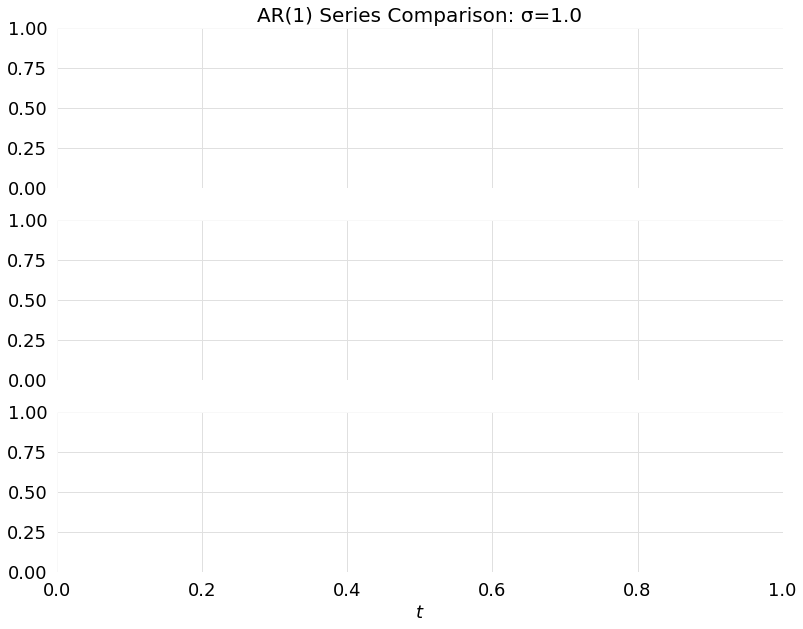

In [21]:
title = f"AR(1) Series Comparison: σ={σ}"
φ_vals = [0.1, 0.5, 0.9]
params = [{"φ": [φ], "σ": σ, "npts": nsample} for φ in φ_vals]
comparison_plot(φ_vals, title, *params)

In [ ]:
title = f"AR(1) Series Comparison: σ={σ}"
φ_vals = [-0.1, -0.5, -0.9]
params = [{"φ": [φ], "σ": σ, "npts": nsample} for φ in φ_vals]
comparison_plot(φ_vals, title, *params)

## Mean

In [ ]:
φ = 0.9
nsample = 100000
cumu_mean_plot(φ, σ, nsample)

In [ ]:
φ = 0.5
nsample = 100000
cumu_mean_plot(φ, σ, nsample)

In [ ]:
φ = 0.3
nsample = 100000
cumu_mean_plot(φ, σ, nsample)

In [ ]:
φ = -0.9
nsample = 100000
cumu_mean_plot(φ, σ, nsample)

In [ ]:
φ = -0.5
cumu_mean_plot(φ, σ, nsample)

In [ ]:
φ = -0.3
nsample = 100000
cumu_mean_plot(φ, σ, nsample)

## Standard Deviation

In [ ]:
φ = 0.9
nsample = 100000
cumu_sd_plot(φ, σ, nsample)

In [ ]:
φ = 0.5
nsample = 100000
cumu_sd_plot(φ, σ, nsample)

In [ ]:
φ = 0.3
nsample = 100000
cumu_sd_plot(φ, σ, nsample)

In [ ]:
φ = -0.9
nsample = 100000
cumu_sd_plot(φ, σ, nsample)

In [ ]:
φ = -0.5
nsample = 100000
cumu_sd_plot(φ, σ, nsample)

In [ ]:
φ = -0.3
nsample = 100000
cumu_sd_plot(φ, σ, nsample)

## Autocorrelation

In [ ]:
φ = 0.9
nlags = 31
nsample = 5000
nsim = 500
ac_plot(φ, σ, nsample, nsim, nlags)

In [ ]:
φ = -0.9
nlags = 51
nsample = 500
nsim = 1000
ac_plot(φ, σ, nsample, nsim, nlags)

In [ ]:
φ = 0.5
nlags = 15
nsample = 5000
nsim = 1000
ac_plot(φ, σ, nsample, nsim, nlags)

In [ ]:
φ = -0.5
nlags = 15
nsample = 5000
nsim = 1000
ac_plot(φ, σ, nsample, nsim, nlags)

In [ ]:
φ = 0.3
nsample = 5000
nsim = 1000
nlags = 15
ac_plot(φ, σ, nsample, nsim, nlags)

In [ ]:
φ = -0.3
nlags = 15
nsample = 5000
nsim = 1000
ac_plot(φ, σ, nsample, nsim, nlags)